### Pull in larger format data

In [12]:
# Imports
import json
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup  # Added for HTML cleaning
import seaborn as sns

In [13]:
# Define category mapping
CATEGORY_MAP = {
    6: 'bug-report',
    5: 'feature-request',
    4: 'general',
    7: 'feedback',
    8: 'help'
}

In [14]:
# Read the bug report data
with open('../data/med_full_data_2025_02_23_13:27.json', 'r') as f:
    data = json.load(f)

# Create lists to store the extracted data
posts = []

# Process each discussion
for thread in data['discussions']:
    # Discussion-level features (shared across all posts in thread)
    discussion_features = {
        'post_discussion_id': thread.get('id'),
        'post_discussion_title': thread.get('title'),
        'post_discussion_created_at': pd.to_datetime(thread.get('created_at')),
        'post_discussion_views': thread.get('views'),
        'post_discussion_reply_count': thread.get('posts_count'),
        'post_discussion_like_count': thread.get('like_count'),
        'post_discussion_participant_count': thread.get('participant_count'),
        'post_discussion_word_count': float(thread.get('word_count', 0)),
        'post_category_id': thread.get('category_id'),
        'post_category_name': CATEGORY_MAP.get(thread.get('category_id')),
        'post_discussion_tags': thread.get('tags', []),
        'post_discussion_url': f"https://forum.cursor.com/t/{thread.get('slug')}/{thread.get('id')}",
    }
    
    # Extract tags (up to 4)
    tags = thread.get('tags', [])
    for i in range(4):
        discussion_features[f'tag{i+1}'] = tags[i] if i < len(tags) else None
        
    # Post-level features
    for post in thread.get('post_stream', {}).get('posts', []):
        post_data = {
            **discussion_features,  # Include all discussion features
            'post_id': post.get('id'),
            'post_author': post.get('username'),
            'post_author_id': post.get('user_id'),
            'post_created_at': post.get('created_at'),
            'post_content': BeautifulSoup(post.get('cooked', ''), 'html.parser').get_text(),
            'post_content_raw': post.get('cooked', ''),
            'post_read_count': post.get('reads', 0),
            'post_reply_count': post.get('reply_count', 0),
            'post_number': post.get('post_number'),
            'accepted_answer_post': float(post.get('accepted_answer', False)),
            'post_url': f"https://forum.cursor.com/t/{thread.get('slug')}/{thread.get('id')}/{post.get('post_number')}",
        }
        posts.append(post_data)
            
df = pd.DataFrame(posts)

# Display basic information about the dataset
print("Dataset Info:")
print(f"Number of discussions: {len(data['discussions'])}")
print(f"Number of posts: {len(df)}")
print("\nDataFrame Head:")
df.head()

Dataset Info:
Number of discussions: 40
Number of posts: 668

DataFrame Head:


,post_discussion_id,post_discussion_title,post_discussion_created_at,post_discussion_views,post_discussion_reply_count,post_discussion_like_count,post_discussion_participant_count,post_discussion_word_count,post_category_id,post_category_name,...,post_author,post_author_id,post_created_at,post_content,post_content_raw,post_read_count,post_reply_count,post_number,accepted_answer_post,post_url
0,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,albatross,16611,2024-12-20T09:02:07.391Z,Holy smokes! This feature is bonkers! Kudos to...,<p>Holy smokes! This feature is bonkers! Kudos...,788,0,1,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...
1,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,andreialcaza,17249,2024-12-20T13:22:21.794Z,I enabled the yolo mode how to use it ?,<p>I enabled the yolo mode how to use it ?</p>,775,1,3,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...
2,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,deanrie,750,2024-12-20T14:58:40.124Z,This is an automatic mode. It can execute term...,<p>This is an automatic mode. It can execute t...,771,0,4,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...
3,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,Napkin,8008,2024-12-20T18:22:57.099Z,how to enable ? I’m on 0.44.5,<p>how to enable ? I’m on 0.44.5</p>,739,1,5,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...
4,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,deanrie,750,2024-12-20T20:47:43.628Z,Go to Cursor settings by pressing Ctrl + Shift...,<p>Go to Cursor settings by pressing Ctrl + Sh...,705,0,6,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...


In [15]:
# Print summary stats
print("=== Dataset Summary ===")
print(f"Total posts: {len(df)}")
print(f"Total discussions: {df['post_discussion_id'].nunique()}")
print(f"Total users: {df['post_author_id'].nunique()}\n")
print(f"Date range: {df['post_created_at'].min()} to {df['post_created_at'].max()}")

=== Dataset Summary ===
Total posts: 668
Total discussions: 40
Total users: 358

Date range: 2023-10-28T04:15:57.691Z to 2025-02-22T17:29:38.525Z


### Sentiment Analysis

Using Twitter-roBERTa-base for sentiment analysis, we generated a post_sentiment label (negative, positive, neutral) and post_sentiment_score confidence score for each post.

In [16]:
# # Import required libraries
# from transformers import pipeline
# import numpy as np
# from scipy.special import softmax

# # Create sentiment analyzer
# def get_sentiment(text):
#     """
#     Analyze sentiment of text using CardiffNLP Twitter RoBERTa model.
#     Returns: Dictionary with sentiment scores for negative, neutral, and positive
#     """
#     try:
#         # Initialize the model (will download on first run)
#         sentiment_task = pipeline(
#             "sentiment-analysis",
#             model="cardiffnlp/twitter-roberta-base-sentiment-latest",
#             tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest"
#         )
        
#         # Clean text
#         text = str(text)  # Ensure text is string
#         text = ' '.join([t if not t.startswith('@') else '@user' for t in text.split()])
#         text = ' '.join([t if not t.startswith('http') else 'http' for t in text.split()])
        
#         # Get sentiment
#         result = sentiment_task(text)[0]  # Truncate to 512 chars to avoid token length issues
#         return result
#     except Exception as e:
#         print(f"Error analyzing sentiment: {e}")
#         return {'label': 'ERROR', 'score': 0.0}

# # Apply sentiment analysis
# print("Analyzing sentiments... this may take a few minutes...")
# df['sentiment'] = df['post_content'].apply(get_sentiment)

# # Extract sentiment labels and scores
# df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])
# df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])

# # Print sentiment distribution
# print("\nSentiment Distribution:")
# print(df['sentiment_label'].value_counts())

# # Calculate average sentiment by discussion
# print("\nAverage Sentiment Score by Discussion:")
# avg_sentiment = df.groupby('post_discussion_title')['sentiment_score'].mean()
# print(avg_sentiment)

# # Visualize results
# plt.figure(figsize=(10, 6))
# df['sentiment_label'].value_counts().plot(kind='bar')
# plt.title('Distribution of Sentiments')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()

In [17]:
from transformers import pipeline
import torch
from tqdm.notebook import tqdm

def get_sentiment_batch(texts, batch_size=32, max_length=512):
    """
    Analyze sentiment of texts in batches using CardiffNLP Twitter RoBERTa model.
    Args:
        texts: List of texts to analyze
        batch_size: Number of texts to process at once
        max_length: Maximum sequence length (will truncate longer sequences)
    Returns: List of dictionaries with sentiment scores
    """
    # Initialize the model (will download on first run)
    sentiment_task = pipeline(
        "sentiment-analysis",
        model="cardiffnlp/twitter-roberta-base-sentiment-latest",
        tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest",
        device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
        truncation=True,
        max_length=max_length
    )
    
    results = []
    # Process in batches with progress bar
    for i in tqdm(range(0, len(texts), batch_size), desc="Analyzing sentiments"):
        batch = texts[i:i + batch_size]
        # Clean text
        batch = [
            ' '.join([t if not t.startswith('@') else '@user' for t in str(text).split()])[:max_length] 
            for text in batch
        ]
        batch = [
            ' '.join([t if not t.startswith('http') else 'http' for t in text.split()])[:max_length]
            for text in batch
        ]
        
        try:
            batch_results = sentiment_task(batch)
            results.extend(batch_results)
        except Exception as e:
            print(f"Error in batch {i}: {e}")
            # Add neutral sentiment for failed items
            results.extend([{'label': 'neutral', 'score': 0.5} for _ in range(len(batch))])
                
    return results

# Apply optimized sentiment analysis
print("Analyzing sentiments with batching and truncation...")
df['sentiment'] = get_sentiment_batch(df['post_content'].tolist())

# Extract sentiment labels and scores
df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])
df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])

Analyzing sentiments with batching and truncation...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set th

Analyzing sentiments:   0%|          | 0/21 [00:00<?, ?it/s]


Sentiment Distribution:
sentiment_label
negative    289
neutral     282
positive     97
Name: count, dtype: int64

Average Sentiment Score by Discussion:
post_discussion_title
"Slow" requests wait times and failures                                                                0.734207
"Your conversation is too long. Please try creating a new conversation or shortening your messages"    0.760881
"i see the issue" from the ai                                                                          0.715117
44.11 Composer Agent constantly stalling / stuck on generating                                         0.772314
Applying changes to a large file fails                                                                 0.700404
Azure extension doesent work                                                                           0.740512
Best hidden function on cursor                                                                         0.819176
Bugs in files that don't exist         

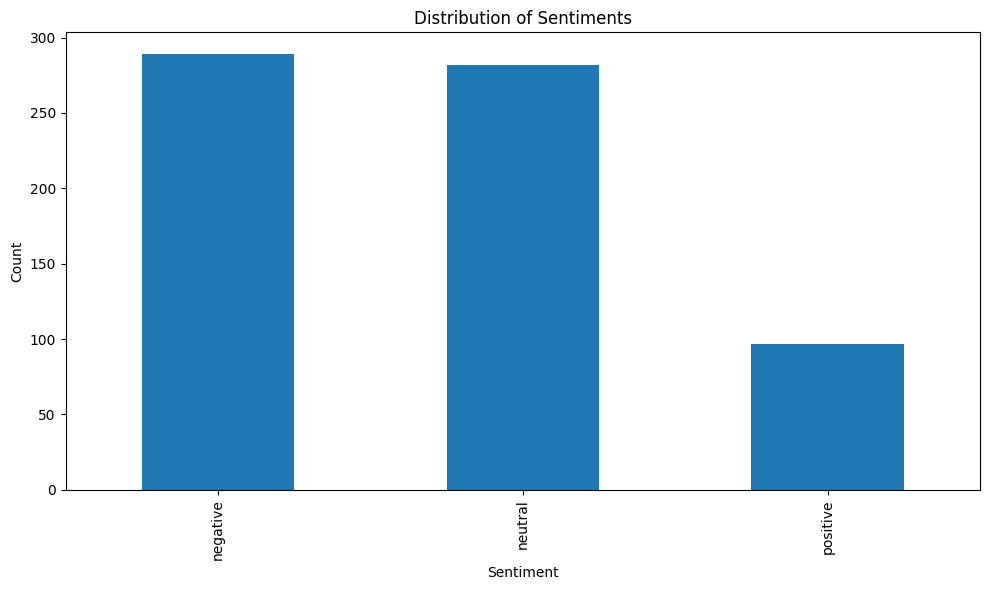

In [18]:

# Print sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment_label'].value_counts())

# Calculate average sentiment by discussion
print("\nAverage Sentiment Score by Discussion:")
avg_sentiment = df.groupby('post_discussion_title')['sentiment_score'].mean()
print(avg_sentiment)

# Visualize results
plt.figure(figsize=(10, 6))
df['sentiment_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [19]:
# Calculate proportions and format as a Series
post_sentiment = df['sentiment_label'].value_counts(normalize=True).round(6)
post_sentiment.name = 'proportion'  # Give it a name to match your desired output
print('post_sentiment')
print(post_sentiment)

post_sentiment
sentiment_label
negative    0.432635
neutral     0.422156
positive    0.145210
Name: proportion, dtype: float64


In [20]:
# Create cross-tabulation using category_id
sentiment_by_category = pd.crosstab(
    index=df['post_category_id'],
    columns=df['sentiment_label'],
    normalize='index'  # This normalizes by row (category)
).round(6)

print("Sentiment Distribution by Category ID:")
print(sentiment_by_category)

# Optional: Let's also see what category IDs we have
print("\nUnique Category IDs:")
print(df['post_category_id'].unique())

Sentiment Distribution by Category ID:
sentiment_label   negative   neutral  positive
post_category_id                              
6                 0.473684  0.407895  0.118421
7                 0.378472  0.440972  0.180556

Unique Category IDs:
[7 6]


### Vector Embeddings

For calculating vector embeddings, [Nomic Embed-Text v1.5](https://huggingface.co/nomic-ai/nomic-embed-text-v1.5) was ran locally with the help of [text-embeddings-inference](https://github.com/huggingface/text-embeddings-inference). Because of it's Matryoshka resizable nature, it's possible to use these embeddings in a bunch of future applications.

Nomic Embed v1.5 was largely selected due to it's large context length.

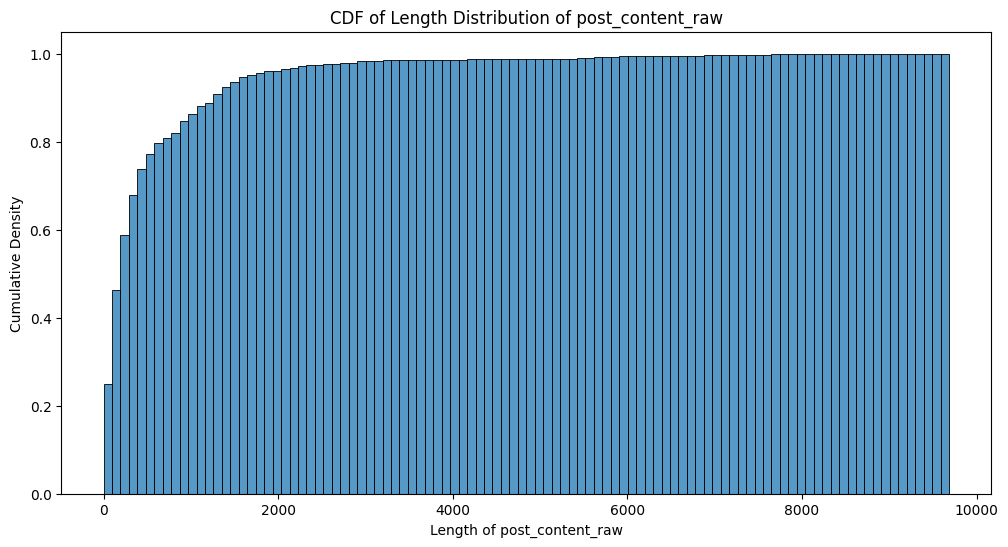

Generating embeddings... this may take a few minutes...


Batches:   0%|          | 0/21 [00:00<?, ?it/s]


Sample of generated embeddings:


,post_content_cluster_embedding,post_content_classification_embedding,post_content_search_document_embedding
0,"[0.003547802334651351, 0.02132352814078331, -0...","[0.003547802334651351, 0.02132352814078331, -0...","[0.003547802334651351, 0.02132352814078331, -0..."
1,"[0.03667560592293739, 0.03303117677569389, -0....","[0.03667560592293739, 0.03303117677569389, -0....","[0.03667560592293739, 0.03303117677569389, -0...."
2,"[-0.0023736469447612762, -0.04565143585205078,...","[-0.0023736469447612762, -0.04565143585205078,...","[-0.0023736469447612762, -0.04565143585205078,..."
3,"[0.028209896758198738, -0.019603025168180466, ...","[0.028209896758198738, -0.019603025168180466, ...","[0.028209896758198738, -0.019603025168180466, ..."
4,"[0.016213230788707733, -0.009003144688904285, ...","[0.016213230788707733, -0.009003144688904285, ...","[0.016213230788707733, -0.009003144688904285, ..."


In [21]:
# Import additional libraries for embeddings
from sentence_transformers import SentenceTransformer
import seaborn as sns

# Set basic plot style
plt.style.use('default')

# Cell - Analyze content length distribution
df['post_content_raw_length'] = df['post_content_raw'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df['post_content_raw_length'],
    bins=100, 
    kde=False, 
    cumulative=True, 
    stat='density'
)
plt.title('CDF of Length Distribution of post_content_raw')
plt.xlabel('Length of post_content_raw')
plt.ylabel('Cumulative Density')
plt.show()

# Cell - Generate embeddings
def generate_embeddings(texts):
    # Initialize the model
    model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and good quality model
    
    # Generate embeddings
    embeddings = model.encode(
        texts,
        show_progress_bar=True,
        batch_size=32  # Adjust based on your memory
    ).tolist()
    
    return embeddings, embeddings, embeddings

# Generate embeddings for our content
print("Generating embeddings... this may take a few minutes...")
cluster_emb, class_emb, search_emb = generate_embeddings(df['post_content_raw'].tolist())

# Add embeddings to dataframe
df['post_content_cluster_embedding'] = cluster_emb
df['post_content_classification_embedding'] = class_emb
df['post_content_search_document_embedding'] = search_emb

# Display sample of embeddings
print("\nSample of generated embeddings:")
df[[
    'post_content_cluster_embedding',
    'post_content_classification_embedding',
    'post_content_search_document_embedding'
]].head()

In [22]:
df.head()

,post_discussion_id,post_discussion_title,post_discussion_created_at,post_discussion_views,post_discussion_reply_count,post_discussion_like_count,post_discussion_participant_count,post_discussion_word_count,post_category_id,post_category_name,...,post_number,accepted_answer_post,post_url,sentiment,sentiment_label,sentiment_score,post_content_raw_length,post_content_cluster_embedding,post_content_classification_embedding,post_content_search_document_embedding
0,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,1,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...,"{'label': 'positive', 'score': 0.951411783695221}",positive,0.951412,318,"[0.003547802334651351, 0.02132352814078331, -0...","[0.003547802334651351, 0.02132352814078331, -0...","[0.003547802334651351, 0.02132352814078331, -0..."
1,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,3,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...,"{'label': 'neutral', 'score': 0.9247536063194275}",neutral,0.924754,46,"[0.03667560592293739, 0.03303117677569389, -0....","[0.03667560592293739, 0.03303117677569389, -0....","[0.03667560592293739, 0.03303117677569389, -0...."
2,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,4,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...,"{'label': 'neutral', 'score': 0.8037393689155579}",neutral,0.803739,169,"[-0.0023736469447612762, -0.04565143585205078,...","[-0.0023736469447612762, -0.04565143585205078,...","[-0.0023736469447612762, -0.04565143585205078,..."
3,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,5,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...,"{'label': 'neutral', 'score': 0.8707258105278015}",neutral,0.870726,36,"[0.028209896758198738, -0.019603025168180466, ...","[0.028209896758198738, -0.019603025168180466, ...","[0.028209896758198738, -0.019603025168180466, ..."
4,36262,YOLO Mode is Amazing!,2024-12-20 09:02:07.337000+00:00,12331,38,82,17,3467.0,7,feedback,...,6,0.0,https://forum.cursor.com/t/yolo-mode-is-amazin...,"{'label': 'neutral', 'score': 0.8866692185401917}",neutral,0.886669,1393,"[0.016213230788707733, -0.009003144688904285, ...","[0.016213230788707733, -0.009003144688904285, ...","[0.016213230788707733, -0.009003144688904285, ..."


### Vector Search


In [23]:
# Import libraries for vector search
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to find similar posts
def find_similar_posts(df, query_id, n_results=5):
    """
    Find similar posts using cosine similarity of embeddings
    
    Args:
        df: DataFrame containing the posts
        query_id: ID of the post to find similar posts to
        n_results: Number of similar posts to return (including the query post)
    """
    # Get the query post's embedding
    query_embedding = df[df['post_id'] == query_id]['post_content_search_document_embedding'].iloc[0]
    
    # Convert all embeddings to numpy array for faster computation
    all_embeddings = np.array(df['post_content_search_document_embedding'].tolist())
    
    # Calculate cosine similarity
    similarities = cosine_similarity([query_embedding], all_embeddings)[0]
    
    # Get indices of most similar posts
    most_similar_indices = similarities.argsort()[-n_results:][::-1]
    
    # Get the similar posts
    similar_posts = df.iloc[most_similar_indices]
    
    # Add similarity scores
    similar_posts = similar_posts.copy()
    similar_posts['similarity_score'] = similarities[most_similar_indices]
    
    return similar_posts

# Example usage - let's find posts similar to the first post in our dataset
query_post_id = df['post_id'].iloc[0]  # Using first post as example

print("Query post:")
print("Title:", df[df['post_id'] == query_post_id]['post_discussion_title'].iloc[0])
print("Content:", df[df['post_id'] == query_post_id]['post_content'].iloc[0][:200], "...\n")

print("\nSimilar posts:")
similar_posts = find_similar_posts(df, query_post_id, n_results=5)
for _, post in similar_posts.iterrows():
    print(f"\nTitle: {post['post_discussion_title']}")
    print(f"Similarity score: {post['similarity_score']:.3f}")
    print(f"Content preview: {post['post_content'][:150]}...")

Query post:
Title: YOLO Mode is Amazing!
Content: Holy smokes! This feature is bonkers! Kudos to the team. The composer is now capable of writing code, executing that code in the terminal, then fixing any bugs that may come up, on repeat, all without ...


Similar posts:

Title: YOLO Mode is Amazing!
Similarity score: 1.000
Content preview: Holy smokes! This feature is bonkers! Kudos to the team. The composer is now capable of writing code, executing that code in the terminal, then fixing...

Title: Is cursor down?
Similarity score: 0.725
Content preview: i trust it with everything and esp with the checkout function in composer if it messes something up, I can undo it easily now. Not saying it never bre...

Title: Is cursor down?
Similarity score: 0.707
Content preview: How so? I avoid Composer most of the time unless I’m building from scratch. I don’t trust anything except “apply”-ing code snippets, but even then I r...

Title: Composer stops writing files
Similarity score: 0.691
Cont

In [24]:
# Function to search posts using custom text
def search_posts_by_text(df, query_text, n_results=5):
    """
    Search posts using a text query
    
    Args:
        df: DataFrame containing the posts
        query_text: Text to search for
        n_results: Number of results to return
    """
    # Generate embedding for the query text
    model = SentenceTransformer('all-MiniLM-L6-v2')
    query_embedding = model.encode([query_text])[0]
    
    # Convert all embeddings to numpy array
    all_embeddings = np.array(df['post_content_search_document_embedding'].tolist())
    
    # Calculate similarities
    similarities = cosine_similarity([query_embedding], all_embeddings)[0]
    
    # Get most similar posts
    most_similar_indices = similarities.argsort()[-n_results:][::-1]
    
    # Get the similar posts
    similar_posts = df.iloc[most_similar_indices].copy()
    similar_posts['similarity_score'] = similarities[most_similar_indices]
    
    return similar_posts

# Example usage - search for posts about a specific topic
query = "Billing Issues"
print(f"Searching for: '{query}'\n")

similar_posts = search_posts_by_text(df, query)
for _, post in similar_posts.iterrows():
    print(f"\nTitle: {post['post_discussion_title']}")
    print(f"Similarity score: {post['similarity_score']:.3f}")
    print(f"Content preview: {post['post_content'][:150]}...")

Searching for: 'Billing Issues'


Title: "Slow" requests wait times and failures
Similarity score: 0.395
Content preview: I really agree here! I’m paying per month for Pro, and I lost a whole workday yesterday, because I didn’t even get the slow request through!
I wait an...

Title: Fast Request Pricing Transparency
Similarity score: 0.392
Content preview: What does it mean that usage-based pricing is billed for every 500 requests (as mentioned on your help page)? Does it mean there is a minimum of $20 e...

Title: "Slow" requests wait times and failures
Similarity score: 0.379
Content preview: Same here! This is not OK for paying Pro-customers....

Title: Long context mode gone in newest update
Similarity score: 0.375
Content preview: The subscription cost increases with usage.
Each usage amount is $20.
I assume they packaged the $20 to be profitable, including the 10x long contexts...

Title: "Your conversation is too long. Please try creating a new conversation or shortening your me

### Preliminary Data Analysis

Here, we attempt to give some basic information about the dataset and it's features which one could potentially continue from.

Total features: 34

Analyzing correlations between these features:
['post_discussion_views', 'post_discussion_reply_count', 'post_discussion_like_count', 'post_discussion_participant_count', 'post_discussion_word_count', 'post_read_count', 'post_reply_count', 'post_number', 'accepted_answer_post', 'sentiment_score', 'post_content_raw_length']


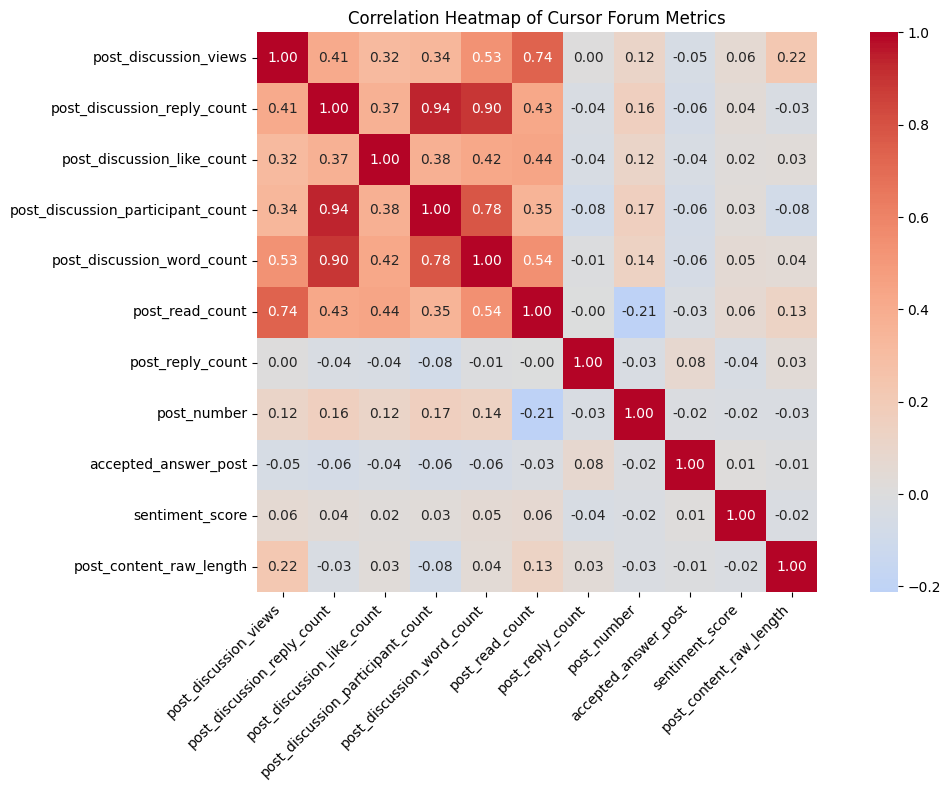


Strongest correlations:
post_discussion_reply_count vs post_discussion_participant_count: 0.943
post_discussion_reply_count vs post_discussion_word_count: 0.895
post_discussion_participant_count vs post_discussion_word_count: 0.782
post_discussion_views vs post_read_count: 0.737
post_discussion_word_count vs post_read_count: 0.543
post_discussion_views vs post_discussion_word_count: 0.535
post_discussion_like_count vs post_read_count: 0.444
post_discussion_reply_count vs post_read_count: 0.426
post_discussion_like_count vs post_discussion_word_count: 0.423
post_discussion_views vs post_discussion_reply_count: 0.410


In [25]:
# Correlation Analysis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# First, let's see what features we have
print("Total features:", df.columns.__len__())

# Create a copy for analysis
og_df = df.copy(deep=True)

# Select only truly numerical columns
numerical_columns = [
    'post_discussion_views',
    'post_discussion_reply_count',
    'post_discussion_like_count',
    'post_discussion_participant_count',
    'post_discussion_word_count',
    'post_read_count',
    'post_reply_count',
    'post_number',
    'accepted_answer_post',
    'sentiment_score',  # Using the score, not the dictionary
    'post_content_raw_length'
]

# Create DataFrame with only numerical columns
df_numerical = df[numerical_columns]

# Print the columns we'll analyze
print("\nAnalyzing correlations between these features:")
print(df_numerical.columns.tolist())

# Calculate and plot correlation matrix
plt.figure(figsize=(12, 8))
corr = df_numerical.corr()
sns.heatmap(
    corr, 
    annot=True,  # Show correlation values
    cmap="coolwarm",  # Red-blue colormap
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Show 2 decimal places
    square=True  # Make cells square
)

plt.title("Correlation Heatmap of Cursor Forum Metrics")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust plot margins
plt.show()

# Print strongest correlations
print("\nStrongest correlations:")
# Get upper triangle of correlations
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# Stack and sort
strongest_corr = (
    upper.stack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Print top 10 correlations
for idx, value in strongest_corr[:10].items():
    print(f"{idx[0]} vs {idx[1]}: {value:.3f}")

### Volume of Posts Over Time

/var/folders/hg/xlym54ps011_3xj339xh45fr0000gn/T/ipykernel_65425/474705622.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['post_created_at'].dt.to_period('M')


<Figure size 1400x800 with 0 Axes>

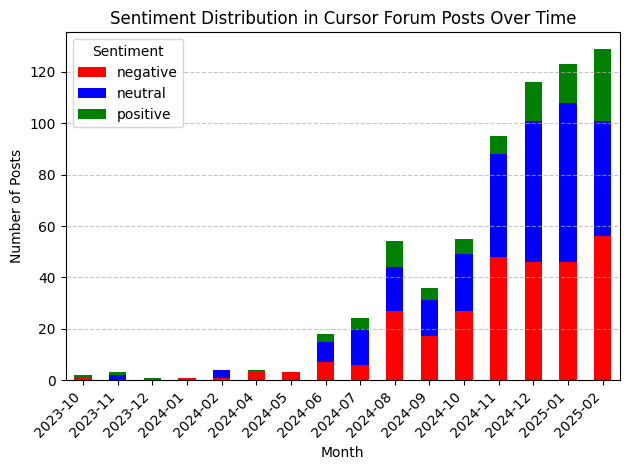


Sentiment Statistics:

Total posts per month:
year_month
2023-10      2
2023-11      3
2023-12      1
2024-01      1
2024-02      4
2024-04      4
2024-05      3
2024-06     18
2024-07     24
2024-08     54
2024-09     36
2024-10     55
2024-11     95
2024-12    116
2025-01    123
2025-02    129
Freq: M, dtype: int64

Sentiment proportions by month:
sentiment_label  negative  neutral  positive
year_month                                  
2023-10              0.50     0.00      0.50
2023-11              0.00     0.67      0.33
2023-12              0.00     0.00      1.00
2024-01              1.00     0.00      0.00
2024-02              0.25     0.75      0.00
2024-04              0.75     0.00      0.25
2024-05              1.00     0.00      0.00
2024-06              0.39     0.44      0.17
2024-07              0.25     0.58      0.17
2024-08              0.50     0.31      0.19
2024-09              0.47     0.39      0.14
2024-10              0.49     0.40      0.11
2024-11          

In [26]:
# Time-based Sentiment Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Convert post_created_at to datetime and create year_month column
df['post_created_at'] = pd.to_datetime(df['post_created_at'])
df['year_month'] = df['post_created_at'].dt.to_period('M')

# Count sentiment labels by month
colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}
sentiment_label_counts_by_month = (
    df.groupby(['year_month', 'sentiment_label']).size().unstack(fill_value=0)
)

# Calculate proportions
total_posts_per_month = sentiment_label_counts_by_month.sum(axis=1)
sentiment_label_proportions_by_month = sentiment_label_counts_by_month.divide(
    total_posts_per_month, axis=0
)

# Create stacked bar plot
plt.figure(figsize=(14, 8))
sentiment_label_counts_by_month.plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in sentiment_label_counts_by_month.columns],
)

plt.title('Sentiment Distribution in Cursor Forum Posts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print some statistics
print("\nSentiment Statistics:")
print("\nTotal posts per month:")
print(total_posts_per_month)

print("\nSentiment proportions by month:")
print(sentiment_label_proportions_by_month.round(2))

# Calculate overall sentiment distribution
print("\nOverall sentiment distribution:")
sentiment_distribution = df['sentiment_label'].value_counts(normalize=True)
for sentiment, proportion in sentiment_distribution.items():
    print(f"{sentiment}: {proportion:.1%}")

### Average Sentiment Over Time

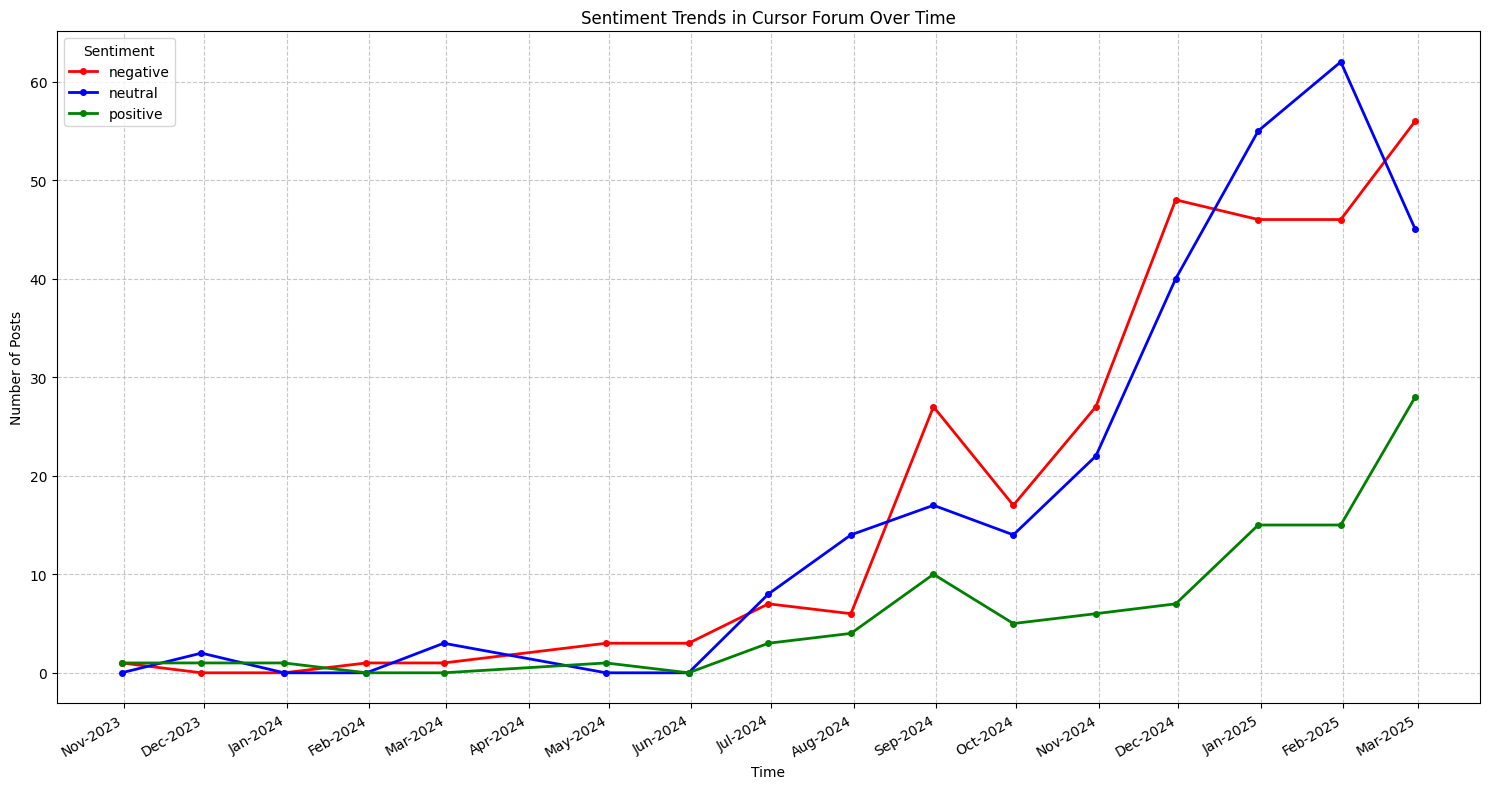


Sentiment Trends Summary:

Peak months for each sentiment:
negative: February 2025 with 56 posts
neutral: January 2025 with 62 posts
positive: February 2025 with 28 posts

Monthly averages:
sentiment_label
negative    18.1
neutral     17.6
positive     6.1
dtype: float64


In [27]:
# Average Sentiment Over Time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Reset index if it was set before
df = df.reset_index()

# Convert to datetime if not already
df['post_created_at'] = pd.to_datetime(df['post_created_at'])

# Set the post_created_at column as the index
df.set_index('post_created_at', inplace=True)

# Create monthly sentiment counts
monthly_sentiment = (
    df.resample('ME')['sentiment_label'].value_counts().unstack(fill_value=0)
)

# Define colors for sentiment
colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}

# Create the plot
plt.figure(figsize=(15, 8))

# Plot lines for each sentiment
for sentiment in monthly_sentiment.columns:
    plt.plot(
        monthly_sentiment.index, 
        monthly_sentiment[sentiment], 
        color=colors[sentiment],
        label=sentiment,
        marker='o',  # Add markers for data points
        markersize=4,
        linewidth=2
    )

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month

# Improve x-axis labels readability
plt.gcf().autofmt_xdate()

# Add labels and title
plt.title('Sentiment Trends in Cursor Forum Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Posts')

# Add legend
plt.legend(title='Sentiment')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print some insights
print("\nSentiment Trends Summary:")
print("\nPeak months for each sentiment:")
for sentiment in monthly_sentiment.columns:
    peak_month = monthly_sentiment[sentiment].idxmax()
    peak_count = monthly_sentiment[sentiment].max()
    print(f"{sentiment}: {peak_month.strftime('%B %Y')} with {peak_count} posts")

print("\nMonthly averages:")
print(monthly_sentiment.mean().round(1))